# Data Analysis with Pandas, Matplotlib, and Seaborn: Exploring Music Trends

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV files
week1 = pd.read_csv('Week1 - 22-Jul-to-28-Jul-2023.csv')
week2 = pd.read_csv('Week2 - 29-Jul-to-4-Aug-2023.csv')
week3 = pd.read_csv('Week3 - 5-Aug-to-11-Aug-2023.csv')
week4 = pd.read_csv('Week4 - 11-Aug-to-17-Aug-2023.csv')

# Add a week identifier to each week's data
week1['Week'] = 'Week1'
week2['Week'] = 'Week2'
week3['Week'] = 'Week3'
week4['Week'] = 'Week4'

# Merge dataframes based on the "Artist" column while maintaining rank order
merged_data = pd.concat([week1, week2, week3, week4], ignore_index=True)

# Display the merged dataframe
print(merged_data)


     Rank                           Artist  \
0       1                        Peggy Gou   
1       2                    Billie Eilish   
2       3                             Jain   
3       4                        Teya Dora   
4       5     Bibi Babydoll & Dj Brunin XM   
..    ...                              ...   
795   196  Francis Lai & Christian Gaubert   
796   197                             a-ha   
797   198                         DYSTINCT   
798   199                     Taylor Swift   
799   200                     Lana Del Rey   

                                                 Title   Week  
0                         (It Goes Like) Nanana (Edit)  Week1  
1    What Was I Made For? [From The Motion Picture ...  Week1  
2                                               Makeba  Week1  
3                                               Džanum  Week1  
4                               Automotivo Bibi Fogosa  Week1  
..                                                 ...    ...  

In [3]:
# Filter the merged dataframe to rows where Rank is 162
filtered_data = merged_data[merged_data['Rank'] == 162]

# Display the filtered data
print(filtered_data)

     Rank               Artist               Title   Week
161   162  Lah Pat & Flo Milli       Rodeo (Remix)  Week1
361   162        Lewis Capaldi   Someone You Loved  Week2
561   162                  M83       Midnight City  Week3
761   162           Bruno Mars  That's What I Like  Week4


# Exploring Music Dataset: Artists, Songs, and Trends

             Rank
count  800.000000
mean   100.500000
std     57.770423
min      1.000000
25%     50.750000
50%    100.500000
75%    150.250000
max    200.000000
Number of unique artists: 234
Songs per week:
Week
Week1    200
Week2    200
Week3    200
Week4    200
Name: Rank, dtype: int64


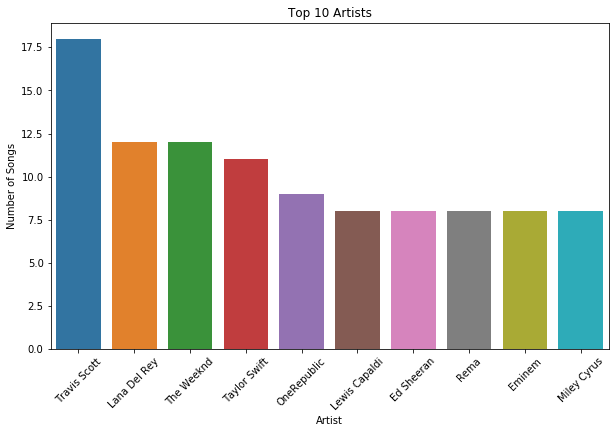

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic statistics of the dataset
print(merged_data.describe())

# Count the number of unique artists
num_unique_artists = len(merged_data['Artist'].unique())
print(f"Number of unique artists: {num_unique_artists}")

# Count the number of songs per week
songs_per_week = merged_data.groupby('Week')['Rank'].count()
print("Songs per week:")
print(songs_per_week)


# Create a count plot for top artists
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Artist', order=merged_data['Artist'].value_counts().index[:10])
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()




             Rank
count  800.000000
mean   100.500000
std     57.770423
min      1.000000
25%     50.750000
50%    100.500000
75%    150.250000
max    200.000000


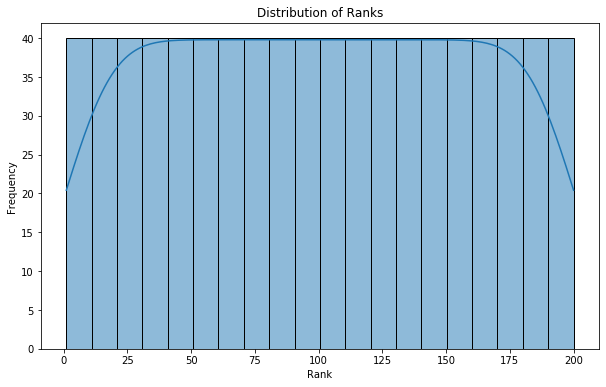

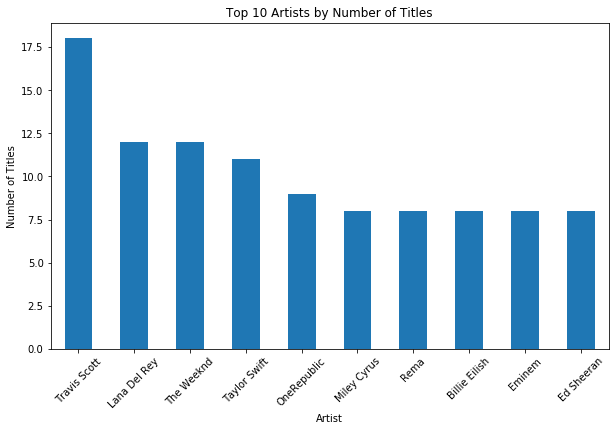

In [5]:

# Display basic statistics of the dataset
print(merged_data.describe())

# Distribution of Ranks
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Rank', bins=20, kde=True)
plt.title('Distribution of Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

# Top Titles by Artist
top_titles = merged_data.groupby('Artist')['Title'].count().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
top_titles.plot(kind='bar')
plt.title('Top 10 Artists by Number of Titles')
plt.xlabel('Artist')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()



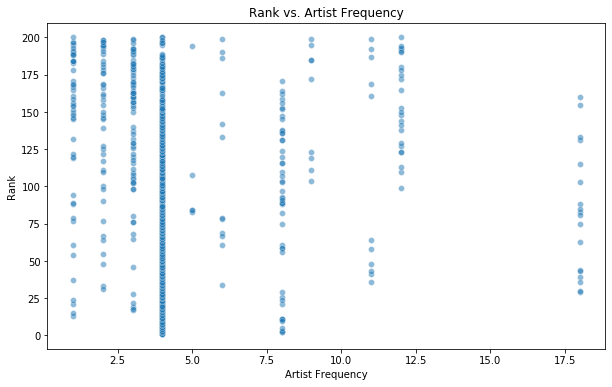

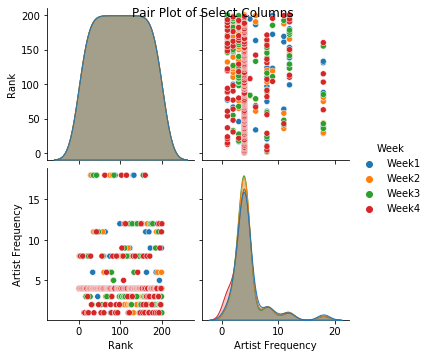

In [6]:


# Scatter Plot of Rank vs. Artist Frequency
artist_frequency = merged_data['Artist'].value_counts()
merged_data['Artist Frequency'] = merged_data['Artist'].apply(lambda x: artist_frequency[x])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Artist Frequency', y='Rank', alpha=0.5)
plt.title('Rank vs. Artist Frequency')
plt.xlabel('Artist Frequency')
plt.ylabel('Rank')
plt.show()

# Pair Plot for Select Columns
selected_columns = ['Rank', 'Artist Frequency', 'Week']
sns.pairplot(data=merged_data[selected_columns], hue='Week')
plt.suptitle('Pair Plot of Select Columns')
plt.show()


             Rank  Artist Frequency
count  800.000000        800.000000
mean   100.500000          4.607500
std     57.770423          2.963853
min      1.000000          1.000000
25%     50.750000          4.000000
50%    100.500000          4.000000
75%    150.250000          4.000000
max    200.000000         18.000000


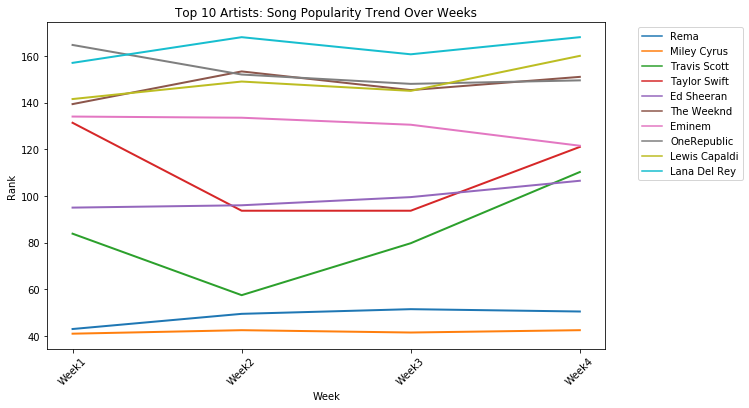

In [7]:


# Display basic statistics of the dataset
print(merged_data.describe())

# Top 10 Artists by Number of Titles
top_10_artists = merged_data['Artist'].value_counts().index[:10]

# Filter data for top 10 artists
top_10_data = merged_data[merged_data['Artist'].isin(top_10_artists)]

# Define the order of weeks
week_order = ['Week1', 'Week2', 'Week3', 'Week4']

# Plot song popularity trend for top 10 artists over weeks
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_data, x='Week', y='Rank', hue='Artist', palette='tab10', ci=None, linewidth=2)
plt.title('Top 10 Artists: Song Popularity Trend Over Weeks')
plt.xlabel('Week')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


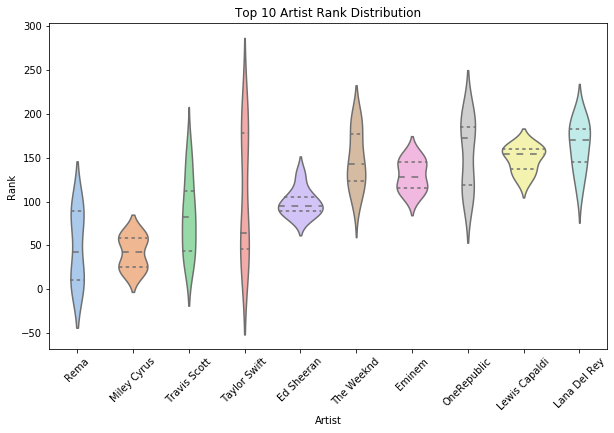

In [8]:
# Top 10 Artists
top_10_artists = merged_data['Artist'].value_counts().head(10).index

# Filter data for the top 10 artists
top_10_data = merged_data[merged_data['Artist'].isin(top_10_artists)]

# Song Rank Distribution by Artist (Top 10)
plt.figure(figsize=(10, 6))
sns.violinplot(data=top_10_data, x='Artist', y='Rank', inner='quartile', palette='pastel')
plt.title('Top 10 Artist Rank Distribution')
plt.xlabel('Artist')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.show()



In [9]:
unique_artists = merged_data['Artist'].unique()
print(unique_artists)


['Peggy Gou' 'Billie Eilish' 'Jain' 'Teya Dora'
 'Bibi Babydoll & Dj Brunin XM' 'The Weeknd & Madonna' 'David Kushner'
 'Loreen' 'Olivia Rodrigo' 'Gunna' 'Rema' 'KALEO' 'Dua Lipa'
 'Nicki Minaj & Ice Spice' 'Dave & Central Cee' 'Dj Belite' 'S3BZS'
 'Jung Kook & Latto' 'Lil Durk' 'NBSPLV' 'Miley Cyrus' 'Myke Towers'
 'Vintazh, ТРАВМА, SKIDRI & Dvrklxght' 'The Kolors'
 'Florence + the Machine' 'Tom Odell' 'Doechii'
 'Purple Disco Machine & Kungs' 'Travis Scott' 'Dr. Dre'
 'David Guetta, Anne-Marie & Coi Leray' 'Calvin Harris & Sam Smith'
 'Asake' 'Diamond Platnumz' 'Lady Gaga' 'Manu Chao' 'Peta Teanet'
 'Calvin Harris & Ellie Goulding' 'Khaid' 'Luke Combs' 'Ayra Starr'
 'INSTASAMKA' 'Travis Scott, Bad Bunny & The Weeknd' 'Adele' 'Sway Burr'
 'FIFTY FIFTY' 'uLazi' 'Tiësto' 'Tyler ICU & Tumelo.za' 'Iniko'
 'Kali Uchis' 'Radiohead' 'Saad Lamjarred & Shreya Ghoshal'
 'Marshmello & Manuel Turizo' 'A.V.G' 'Libianca' 'Tears for Fears'
 'Metro Boomin, The Weeknd & Diddy' 'Bad Bunny' 'Post Malone

Enter your favorite artist's name: Billie Eilish


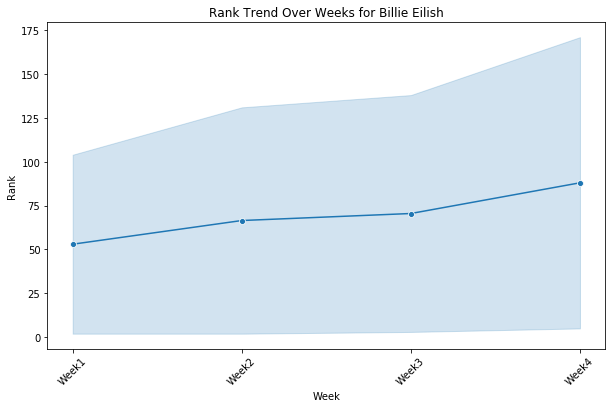

In [10]:
# Song Ranks Over Weeks for a Specific Artist
specific_artist = input("Enter your favorite artist's name: ")
artist_data = merged_data[merged_data['Artist'] == specific_artist]
if artist_data.empty:
    print(f"No data found for {specific_artist}.")
else:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=artist_data, x='Week', y='Rank', marker='o')
    plt.title(f'Rank Trend Over Weeks for {specific_artist}')
    plt.xlabel('Week')
    plt.ylabel('Rank')
    plt.xticks(rotation=45)
    plt.show()



Enter your favorite artist's name: Olivia Rodrigo


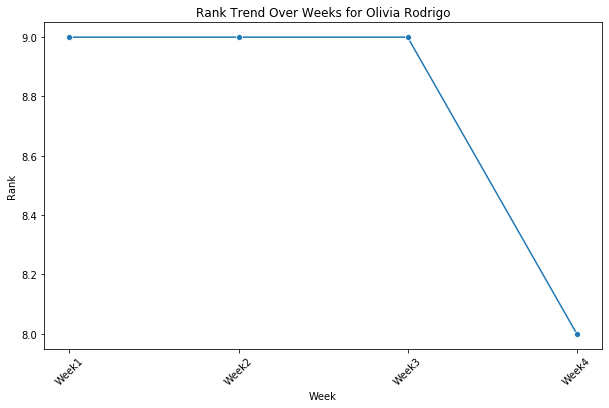

In [11]:
# Song Ranks Over Weeks for a Specific Artist
specific_artist = input("Enter your favorite artist's name: ")
artist_data = merged_data[merged_data['Artist'] == specific_artist]
if artist_data.empty:
    print(f"No data found for {specific_artist}.")
else:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=artist_data, x='Week', y='Rank', marker='o')
    plt.title(f'Rank Trend Over Weeks for {specific_artist}')
    plt.xlabel('Week')
    plt.ylabel('Rank')
    plt.xticks(rotation=45)
    plt.show()

